In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
from sklearn.model_selection import train_test_split
import j_process ####Required to load custom modeling functions
import j_clustertuner ####Required for best K functions
import psutil
import os
from pathlib import Path ####Required for save checks
import prince ####Required for MCA functions


2025-06-15 02:23:15.316707: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-15 02:23:15.321271: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-15 02:23:15.333206: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749968595.351754 3819365 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749968595.357323 3819365 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1749968595.372314 3819365 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [2]:
df = pd.read_parquet("filtered.parquet")

In [3]:
df.head()

,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,CHCSCNC1,CHCOCNC1,CHCCOPD3,CHCKDNY2,HAVARTH4,DIABETE4,EDUCA,DEAF,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,ECIGNOW2,FLUSHOT7,PNEUVAC4,SEATBELT,COVIDPO1,GENHLTH,EXERANY2,TOLDHI3
0,No,No,No,No - Go to Section 07.06 CHCSCNC1,No,No,No,No,No,Yes,College 1 year to 3 years (Some college or tec...,No,No,No,Yes,No,No,No - Go to Section 12.03 USENOW3,Never used e-cigarettes in your entire life,No - Go to Section 13.03 PNEUVAC4,No,Always,No - Go to Modules or Closing Statement,Very good,No - Go to Section 04.08 STRENGTH,No
1,No,No,No,No - Go to Section 07.06 CHCSCNC1,No,No,No,No,Yes,No - Go to Section 08.01 AGE,College 1 year to 3 years (Some college or tec...,Yes,No,No,No,No,No,No - Go to Section 12.03 USENOW3,Never used e-cigarettes in your entire life,Yes,Yes,Always,No - Go to Modules or Closing Statement,Very good,Yes,Yes
2,No,No,No,Yes,No,No,No,No,Yes,No - Go to Section 08.01 AGE,Grade 12 or GED (High school graduate),Don't know/Not Sure,Yes,Yes,Yes,No,No,Yes,Never used e-cigarettes in your entire life,Yes,Yes,Always,No - Go to Modules or Closing Statement,Fair,Yes,Yes
3,No,No,No,No - Go to Section 07.06 CHCSCNC1,Yes,Yes,No,No,Yes,No - Go to Section 08.01 AGE,College 1 year to 3 years (Some college or tec...,No,No,No,Yes,No,No,No - Go to Section 12.03 USENOW3,Never used e-cigarettes in your entire life,Yes,Yes,Always,No - Go to Modules or Closing Statement,Very good,Yes,No
4,No,No,No,No - Go to Section 07.06 CHCSCNC1,No,Yes,No,No,Yes,Yes,College 1 year to 3 years (Some college or tec...,No,No,Yes,Yes,No,Yes,No - Go to Section 12.03 USENOW3,Never used e-cigarettes in your entire life,No - Go to Section 13.03 PNEUVAC4,Yes,Always,No - Go to Modules or Closing Statement,Fair,Yes,No


In [4]:
#Just a function to help me visualize each feature

def i_graph(colname):
    ig_counts = df[colname].value_counts(dropna=False)
    
    print("Value counts for", colname)
    print(ig_counts)
    


In [5]:
def repval(colname, stringstorepl):
    df[colname] = df[colname].replace(stringstorepl,np.nan)
    rg_counts = df[colname].value_counts(dropna=False)





In [6]:
def basic_plot(colname):
    rg_counts = df[colname].value_counts(dropna=False)
    rg_ax = rg_counts.plot(kind='bar')
    plt.title('Counts per Category')
    plt.xlabel('Category')
    plt.ylabel('Count')


    for i, v in enumerate(rg_counts):
        rg_ax.text(i, v + max(rg_counts) * 0.01, str(v), ha='center', va='bottom')

    plt.tight_layout()
    rg_title = colname
    rg_filename = rg_title.replace(" ", "_").replace("/", "-") + ".jpg"
    plt.savefig(rg_filename, format='jpg', dpi=300)
    plt.show()


In [7]:
default = ["Don't know/Not sure","Refused","Missing","Don't know / Not sure","Don't know/Not Sure"]
repval("CVDINFR4", ["Don't know/Not sure", "Refused", "Missing"])
repval("CVDCRHD4", ["Don't know/Not sure", "Refused", "Missing"])
repval("CVDSTRK3", default)
df["ASTHMA3"] = df["ASTHMA3"].replace(["No -  Go to Section 07.06 CHCSCNC1"], "No")
repval("ASTHMA3",
       ["Don't know/Not Sure -  Go to Section 07.06 CHCSCNC1", "Refused -  Go to Section 07.06 CHCSCNC1", "Missing"])
repval("CHCSCNC1", default)
repval("CHCOCNC1", default)
repval("CHCCOPD3", default)
repval("CHCKDNY2", default)
repval("HAVARTH4", default)
df["DIABETE4"]=df["DIABETE4"].replace(["No -  Go to Section 08.01 AGE"],"No")
repval("DIABETE4", ["No, pre-diabetes or borderline diabetes -  Go to Section 08.01 AGE", "Yes, but female told only during pregnancy -  Go to Section 08.01 AGE", "Don't know/Not Sure -  Go to Section 08.01 AGE", "Refused -  Go to Section 08.01 AGE"])
df["EDUCA"]=df["EDUCA"].replace(["College 4 years or more (College graduate)"],"Bachelors degree or Higher")
df["EDUCA"]=df["EDUCA"].replace(["College 1 year to 3 years (Some college or technical school)"],"Some College or Associates")
df["EDUCA"]=df["EDUCA"].replace(["Grade 12 or GED (High school graduate)"],"High School Graduate")
df["EDUCA"]=df["EDUCA"].replace(["Grades 9 through 11 (Some high school)"],"Some High School")
df["EDUCA"]=df["EDUCA"].replace(["Grades 1 through 8 (Elementary)"],"Elementary Only")
df["EDUCA"]=df["EDUCA"].replace(["Never attended school or only kindergarten"],"None or Kindergarten Only")
repval("EDUCA", default)
repval("DEAF", default)
repval("BLIND", default)
repval("DECIDE", default)
repval("DIFFWALK", default)
repval("DIFFDRES", default)
repval("DIFFALON", default)
df["SMOKE100"]=df["SMOKE100"].replace(["No -  Go to Section 12.03 USENOW3"],"No")
df["SMOKE100"]=df["SMOKE100"].replace(["Don't know/Not Sure -  Go to Section 12.03 USENOW3"],"Don't know/Not Sure")
df["SMOKE100"]=df["SMOKE100"].replace(["Refused -  Go to Section 12.03 USENOW3"],"Refused")
repval("SMOKE100", default)
df["ECIGNOW2"]=df["ECIGNOW2"].replace(["Never used e-cigarettes in your entire life"],"Never")
df["ECIGNOW2"]=df["ECIGNOW2"].replace(["Not at all (right now)"],"Not Currently")
df["ECIGNOW2"]=df["ECIGNOW2"].replace(["Use them some days"],"Some Days")
df["ECIGNOW2"]=df["ECIGNOW2"].replace(["Use them every day"],"Every Day")
df["FLUSHOT7"]=df["FLUSHOT7"].replace(["No -  Go to Section 13.03 PNEUVAC4"],"No")
df["FLUSHOT7"]=df["FLUSHOT7"].replace(["Don't know/Not Sure -  Go to Section 13.03 PNEUVAC4"],"Don't know/Not sure")
df["FLUSHOT7"]=df["FLUSHOT7"].replace(["Refused -  Go to Section 13.03 PNEUVAC4"],"Refused")
repval("ECIGNOW2", default)
repval("FLUSHOT7", default)
repval("PNEUVAC4", default)
df["SEATBELT"]=df["SEATBELT"].replace(["Never drive or ride in a car -  Go to Section 16.1 COVIDPO1"],"Refused")

repval("SEATBELT", default)
df["COVIDPO1"]=df["COVIDPO1"].replace(["No -  Go to Modules or Closing Statement"],"No")
df["COVIDPO1"]=df["COVIDPO1"].replace(["Refused -  Go to Modules or Closing Statement"],"Refused")
df["COVIDPO1"]=df["COVIDPO1"].replace(["Don't know/Not Sure -  Go to Modules or Closing Statement"],"Don't know/Not sure")

repval("COVIDPO1", default)
repval("GENHLTH", default)
df["EXERANY2"]=df["EXERANY2"].replace(["No -  Go to Section 04.08 STRENGTH"],"No")
df["EXERANY2"]=df["EXERANY2"].replace(["Don't know/Not Sure -  Go to Section 04.08 STRENGTH"],"Don't know/Not sure")
df["EXERANY2"]=df["EXERANY2"].replace(["Refused -  Go to Section 04.08 STRENGTH"],"Refused")

repval("EXERANY2", default)
repval("TOLDHI3", default)

In [8]:
j_process.resp_tally2(df)

,CVDINFR4,CVDINFR4_count,CVDCRHD4,CVDCRHD4_count,CVDSTRK3,CVDSTRK3_count,ASTHMA3,ASTHMA3_count,CHCSCNC1,CHCSCNC1_count,CHCOCNC1,CHCOCNC1_count,CHCCOPD3,CHCCOPD3_count,CHCKDNY2,CHCKDNY2_count,HAVARTH4,HAVARTH4_count,DIABETE4,DIABETE4_count,EDUCA,EDUCA_count,DEAF,DEAF_count,BLIND,BLIND_count,DECIDE,DECIDE_count,DIFFWALK,DIFFWALK_count,DIFFDRES,DIFFDRES_count,DIFFALON,DIFFALON_count,SMOKE100,SMOKE100_count,ECIGNOW2,ECIGNOW2_count,FLUSHOT7,FLUSHOT7_count,PNEUVAC4,PNEUVAC4_count,SEATBELT,SEATBELT_count,COVIDPO1,COVIDPO1_count,GENHLTH,GENHLTH_count,EXERANY2,EXERANY2_count,TOLDHI3,TOLDHI3_count
0,No,407304.0,No,405638.0,No,413499.0,No,367256.0,No,393826.0,No,380431.0,No,398160.0,No,410876.0,No,287999.0,No,358706.0,Bachelors degree or Higher,184867,No,379796.0,No,395423.0,No,365547.0,No,348452.0,No,399108.0,No,381959.0,No,251981.0,Never,318696.0,No,204711.0,No,208403.0,Always,350207.0,Yes,201248.0,Good,144209.0,Yes,325227.0,No,219333.0
1,Yes,23451.0,Yes,23454.0,Yes,18350.0,Yes,64366.0,Yes,36567.0,Yes,50555.0,Yes,33097.0,Yes,20555.0,Yes,142764.0,Yes,59786.0,Some College or Associates,114346,Yes,38735.0,Yes,22190.0,Yes,49648.0,Yes,67021.0,nan,17676.0,Yes,31964.0,Yes,158774.0,Not Currently,69110.0,Yes,197294.0,Yes,162037.0,nan,32378.0,No,197981.0,Very good,142115.0,No,106845.0,Yes,158906.0
2,nan,2568.0,nan,4231.0,nan,1474.0,nan,1701.0,nan,2930.0,nan,2337.0,nan,2066.0,nan,1892.0,nan,2560.0,nan,14826.0,High School Graduate,106613,nan,14792.0,nan,15710.0,nan,18128.0,nan,17850.0,Yes,16539.0,nan,19400.0,nan,22568.0,nan,23251.0,nan,31318.0,nan,62883.0,Nearly always,28281.0,nan,34094.0,Excellent,63410.0,nan,1251.0,nan,55084.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Missing,5.0,Some High School,16161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Some Days,11164.0,NaN,NaN,NaN,NaN,Sometimes,10885.0,NaN,NaN,Fair,61955.0,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Elementary Only,8324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Every Day,11102.0,NaN,NaN,NaN,NaN,Never,7263.0,NaN,NaN,Poor,20372.0,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,2325,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Seldom,4309.0,NaN,NaN,nan,1262.0,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None or Kindergarten Only,687,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
print(df.isna().sum())
print(df.shape)
df.dropna(inplace=True)
print(df.shape)


CVDINFR4     2568
CVDCRHD4     4231
CVDSTRK3     1474
ASTHMA3      1701
CHCSCNC1     2930
CHCOCNC1     2337
CHCCOPD3     2066
CHCKDNY2     1892
HAVARTH4     2560
DIABETE4    14826
EDUCA        2325
DEAF        14792
BLIND       15710
DECIDE      18128
DIFFWALK    17850
DIFFDRES    17676
DIFFALON    19400
SMOKE100    22568
ECIGNOW2    23251
FLUSHOT7    31318
PNEUVAC4    62883
SEATBELT    32378
COVIDPO1    34094
GENHLTH      1262
EXERANY2     1251
TOLDHI3     55084
dtype: int64
(433323, 26)
(292773, 26)


In [10]:
columns_to_check = ['CVDINFR4', 'CVDCRHD4', 'CVDSTRK3','ASTHMA3','CHCSCNC1','CHCOCNC1','CHCCOPD3','CHCKDNY2','HAVARTH4','DIABETE4']
chronic_col = columns_to_check
df['ALL_CHRONIC'] = df[columns_to_check].eq('Yes').any(axis=1).map({True: 'Yes', False: 'No'})


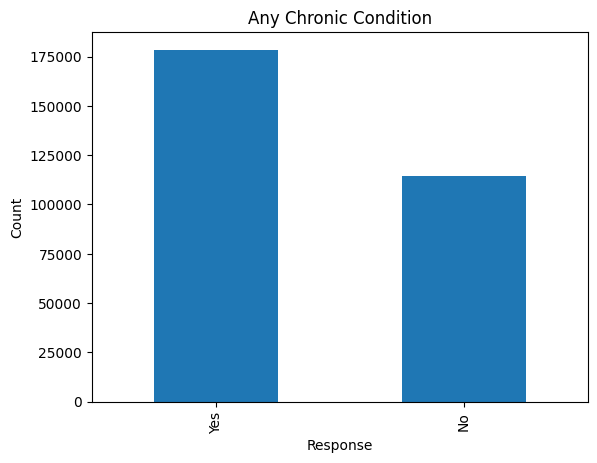

ALL_CHRONIC
Yes    0.609797
No     0.390203
Name: proportion, dtype: float64

In [11]:
df['ALL_CHRONIC'].value_counts(dropna=False)
df['ALL_CHRONIC'].value_counts().plot(kind='bar')
plt.title('Any Chronic Condition')
plt.xlabel('Response')
plt.ylabel('Count')
title = plt.gca().get_title()
filename = title.replace(" ", "_").replace("/", "-") + ".jpg"
plt.savefig(filename, format='jpg', dpi=300)
plt.show()
df['ALL_CHRONIC'].value_counts(normalize=True, dropna=False)

In [12]:
columns_to_check = ['CVDINFR4', 'CVDCRHD4', 'CVDSTRK3','ASTHMA3','CHCSCNC1','CHCOCNC1','CHCCOPD3','CHCKDNY2','DIABETE4']

df['ALL_CHRONIC2'] = df[columns_to_check].eq('Yes').any(axis=1).map({True: 'Yes', False: 'No'})

In [13]:
columns_to_check = ['CVDINFR4', 'CVDCRHD4', 'CVDSTRK3']

df['ALL_CARDIAC'] = df[columns_to_check].eq('Yes').any(axis=1).map({True: 'Yes', False: 'No'})

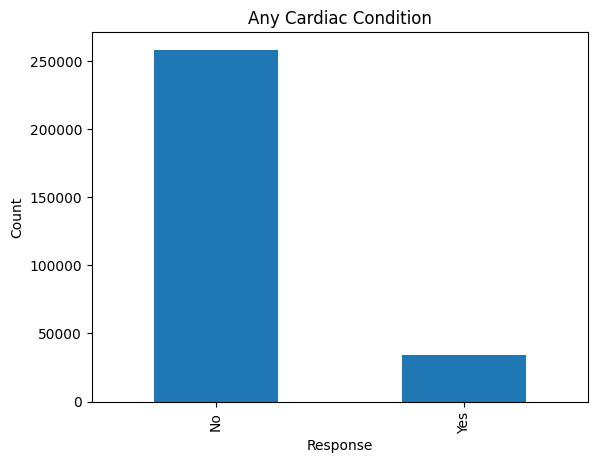

ALL_CARDIAC
No     0.882219
Yes    0.117781
Name: proportion, dtype: float64

In [14]:
df['ALL_CARDIAC'].value_counts(dropna=False)
df['ALL_CARDIAC'].value_counts().plot(kind='bar')
plt.title('Any Cardiac Condition')
plt.xlabel('Response')
plt.ylabel('Count')
title = plt.gca().get_title()
filename = title.replace(" ", "_").replace("/", "-") + ".jpg"
plt.savefig(filename, format='jpg', dpi=300)
plt.show()
df['ALL_CARDIAC'].value_counts(normalize=True, dropna=False)

In [15]:
columns_to_check = ['CHCSCNC1','CHCOCNC1']

df['ALL_CANCER'] = df[columns_to_check].eq('Yes').any(axis=1).map({True: 'Yes', False: 'No'})

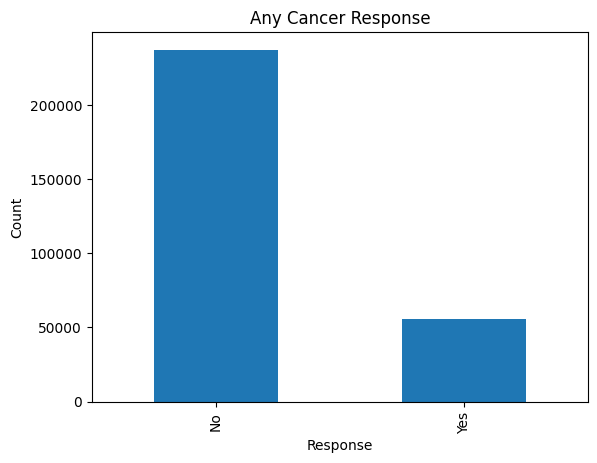

ALL_CANCER
No     0.809986
Yes    0.190014
Name: proportion, dtype: float64

In [16]:
df['ALL_CANCER'].value_counts(dropna=False)
df['ALL_CANCER'].value_counts().plot(kind='bar')
plt.title('Any Cancer Response')
plt.xlabel('Response')
plt.ylabel('Count')
title = plt.gca().get_title()
filename = title.replace(" ", "_").replace("/", "-") + ".jpg"
plt.savefig(filename, format='jpg', dpi=300)
plt.show()
df['ALL_CANCER'].value_counts(normalize=True, dropna=False)

In [17]:
columns_to_check = ['ASTHMA3','CHCCOPD3']

df['ALL_PUL'] = df[columns_to_check].eq('Yes').any(axis=1).map({True: 'Yes', False: 'No'})

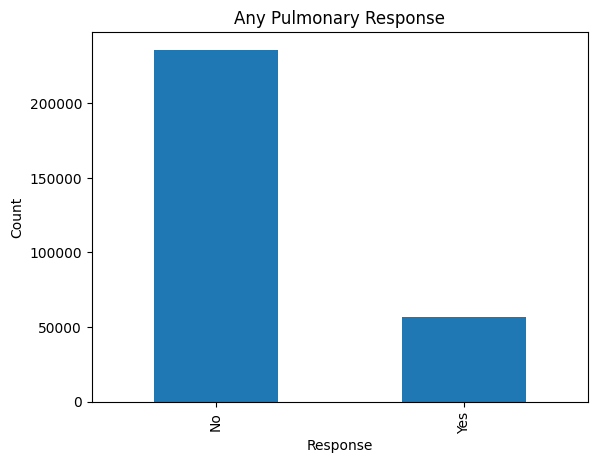

ALL_PUL
No     0.805812
Yes    0.194188
Name: proportion, dtype: float64

In [18]:
df['ALL_PUL'].value_counts(dropna=False)
df['ALL_PUL'].value_counts().plot(kind='bar')
plt.title('Any Pulmonary Response')
plt.xlabel('Response')
plt.ylabel('Count')
title = plt.gca().get_title()
filename = title.replace(" ", "_").replace("/", "-") + ".jpg"
plt.savefig(filename, format='jpg', dpi=300)
plt.show()
df['ALL_PUL'].value_counts(normalize=True, dropna=False)

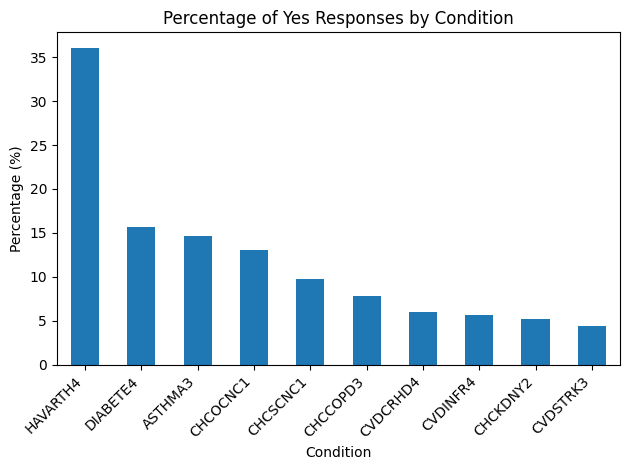

In [19]:


columns_to_check = [
    'CVDINFR4', 'CVDCRHD4', 'CVDSTRK3',
    'ASTHMA3', 'CHCSCNC1', 'CHCOCNC1',
    'CHCCOPD3', 'CHCKDNY2', 'HAVARTH4', 'DIABETE4'
]
yes_rates = {
    col: (df[col] == "Yes").mean() * 100  
    for col in columns_to_check
}


yes_df = pd.Series(yes_rates).sort_values(ascending=False)

ax = yes_df.plot(kind='bar')
plt.title('Percentage of Yes Responses by Condition')
plt.ylabel('Percentage (%)')
plt.xlabel('Condition')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
title = plt.gca().get_title()
filename = title.replace(" ", "_").replace("/", "-") + ".jpg"
plt.savefig(filename, format='jpg', dpi=300)
plt.show()


In [20]:
column_list = df.columns.tolist()
print(column_list)
feature_list = [col for col in column_list if col not in chronic_col]
deriv_col = ['ALL_CHRONIC','ALL_CARDIAC','ALL_CANCER','ALL_PUL','ALL_CHRONIC2']

['CVDINFR4', 'CVDCRHD4', 'CVDSTRK3', 'ASTHMA3', 'CHCSCNC1', 'CHCOCNC1', 'CHCCOPD3', 'CHCKDNY2', 'HAVARTH4', 'DIABETE4', 'EDUCA', 'DEAF', 'BLIND', 'DECIDE', 'DIFFWALK', 'DIFFDRES', 'DIFFALON', 'SMOKE100', 'ECIGNOW2', 'FLUSHOT7', 'PNEUVAC4', 'SEATBELT', 'COVIDPO1', 'GENHLTH', 'EXERANY2', 'TOLDHI3', 'ALL_CHRONIC', 'ALL_CHRONIC2', 'ALL_CARDIAC', 'ALL_CANCER', 'ALL_PUL']


In [21]:
feature_list = [col for col in feature_list if col not in deriv_col]
print(feature_list)

['EDUCA', 'DEAF', 'BLIND', 'DECIDE', 'DIFFWALK', 'DIFFDRES', 'DIFFALON', 'SMOKE100', 'ECIGNOW2', 'FLUSHOT7', 'PNEUVAC4', 'SEATBELT', 'COVIDPO1', 'GENHLTH', 'EXERANY2', 'TOLDHI3']



Value counts for EDUCA:
EDUCA
Bachelors degree or Higher    134661
Some College or Associates     77986
High School Graduate           66431
Some High School                9033
Elementary Only                 4368
None or Kindergarten Only        294
Name: count, dtype: int64


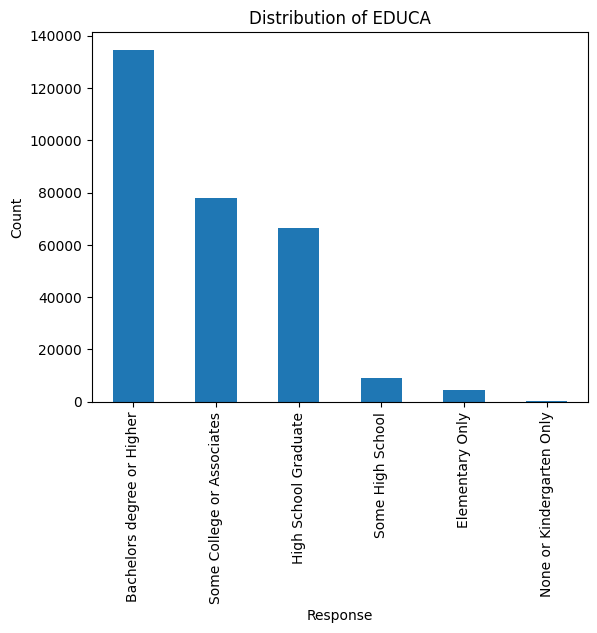


Value counts for DEAF:
DEAF
No     265699
Yes     27074
Name: count, dtype: int64


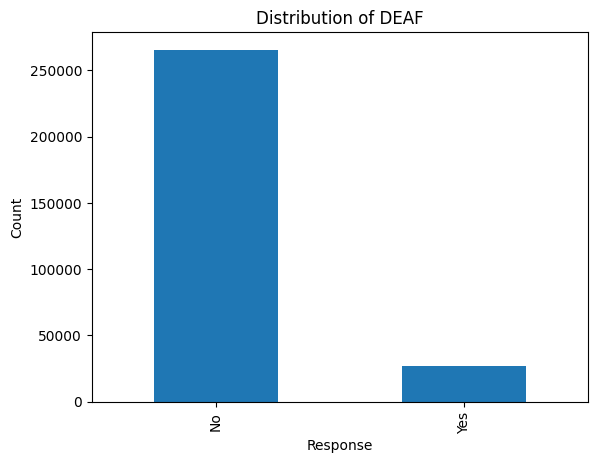


Value counts for BLIND:
BLIND
No     278366
Yes     14407
Name: count, dtype: int64


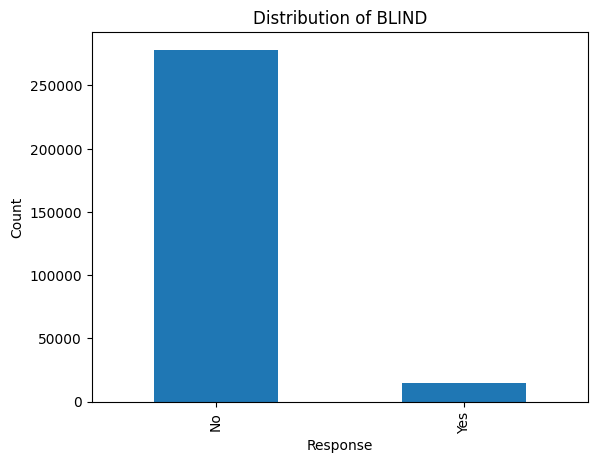


Value counts for DECIDE:
DECIDE
No     263172
Yes     29601
Name: count, dtype: int64


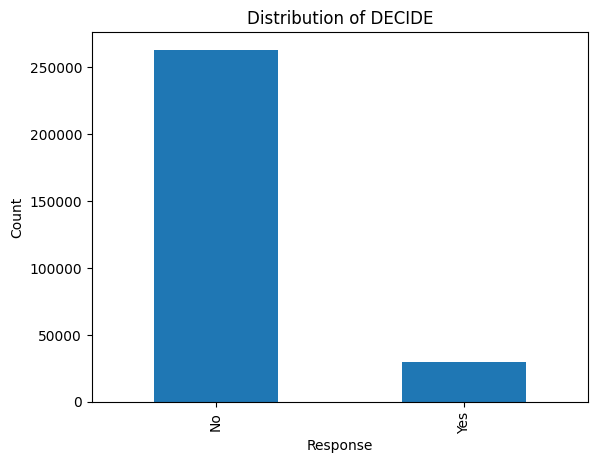


Value counts for DIFFWALK:
DIFFWALK
No     245793
Yes     46980
Name: count, dtype: int64


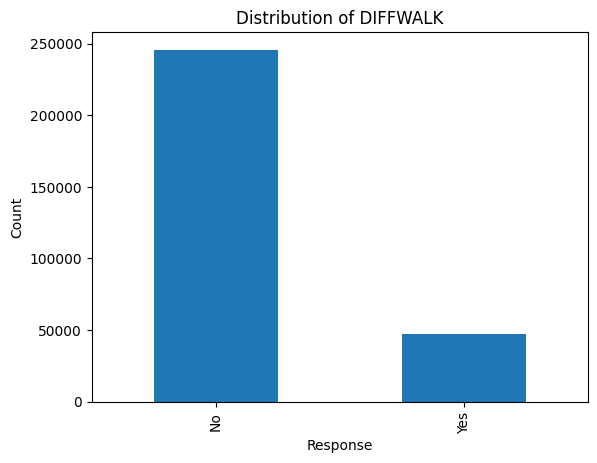


Value counts for DIFFDRES:
DIFFDRES
No     282083
Yes     10690
Name: count, dtype: int64


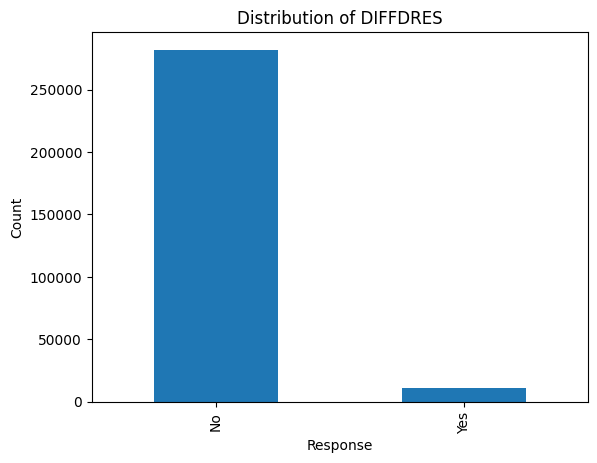


Value counts for DIFFALON:
DIFFALON
No     272651
Yes     20122
Name: count, dtype: int64


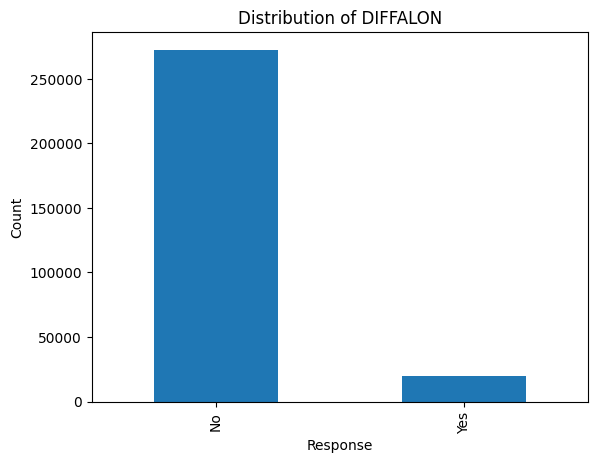


Value counts for SMOKE100:
SMOKE100
No     178357
Yes    114416
Name: count, dtype: int64


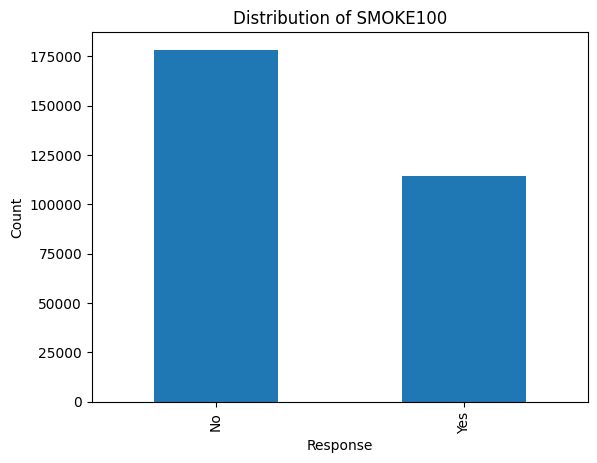


Value counts for ECIGNOW2:
ECIGNOW2
Never            235691
Not Currently     44771
Some Days          6372
Every Day          5939
Name: count, dtype: int64


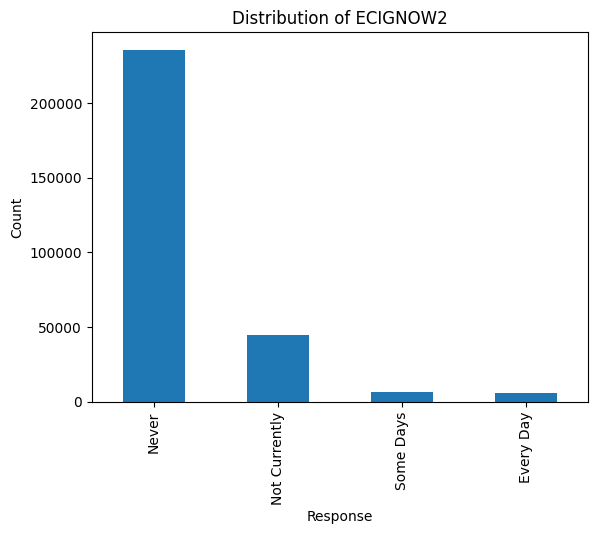


Value counts for FLUSHOT7:
FLUSHOT7
Yes    153135
No     139638
Name: count, dtype: int64


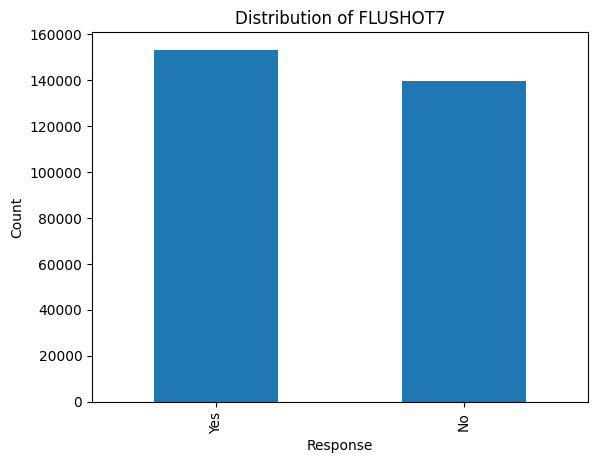


Value counts for PNEUVAC4:
PNEUVAC4
No     159816
Yes    132957
Name: count, dtype: int64


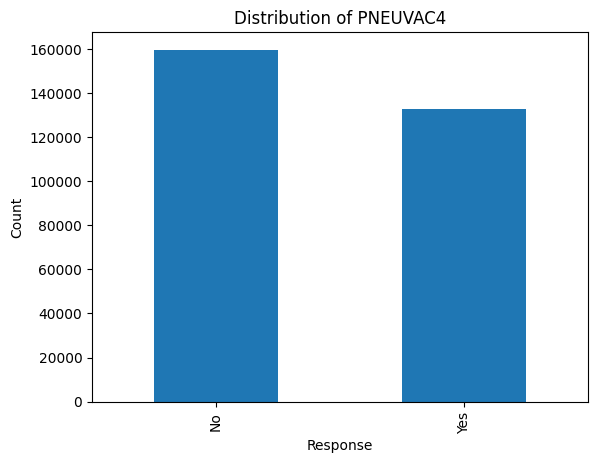


Value counts for SEATBELT:
SEATBELT
Always           259449
Nearly always     19013
Sometimes          6973
Never              4618
Seldom             2720
Name: count, dtype: int64


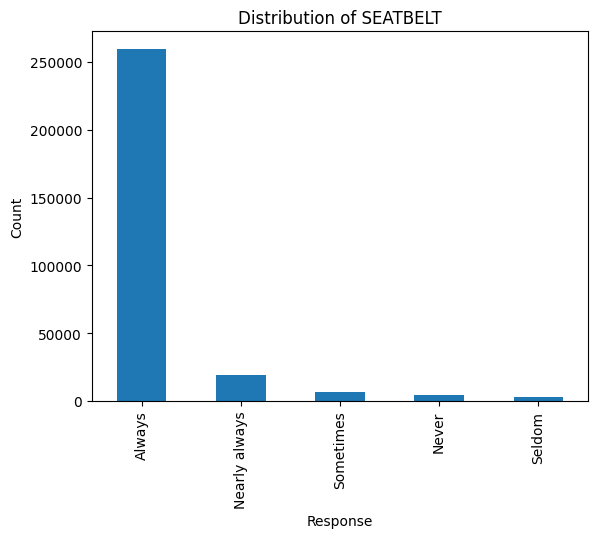


Value counts for COVIDPO1:
COVIDPO1
Yes    148942
No     143831
Name: count, dtype: int64


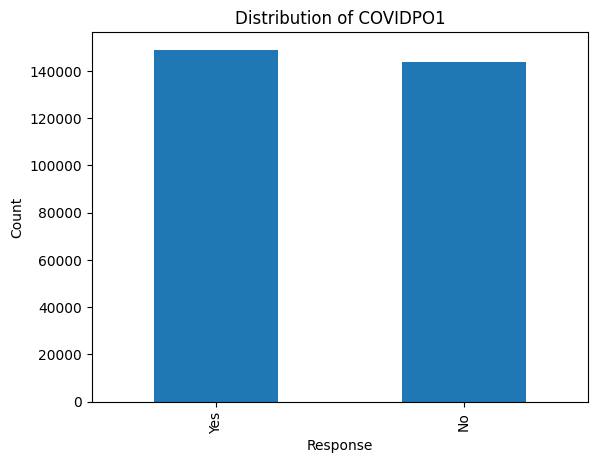


Value counts for GENHLTH:
GENHLTH
Very good    100540
Good          96688
Excellent     42846
Fair          40032
Poor          12667
Name: count, dtype: int64


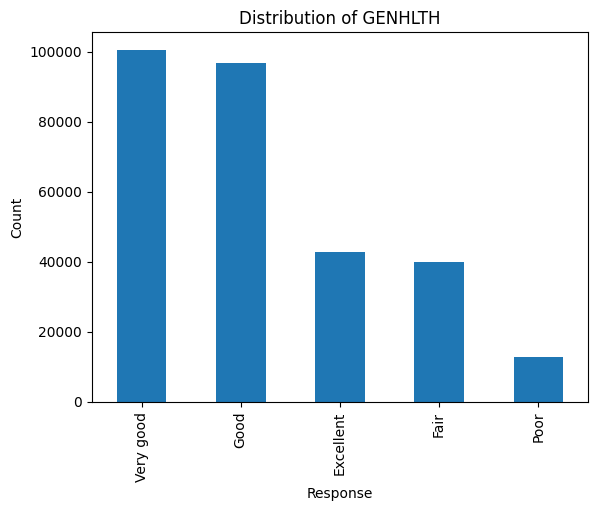


Value counts for EXERANY2:
EXERANY2
Yes    223709
No      69064
Name: count, dtype: int64


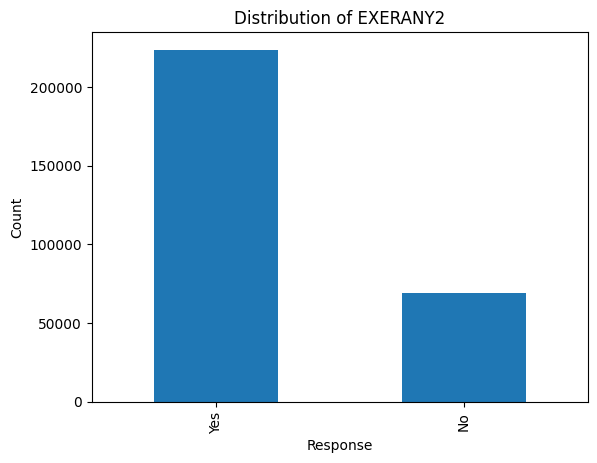


Value counts for TOLDHI3:
TOLDHI3
No     168946
Yes    123827
Name: count, dtype: int64


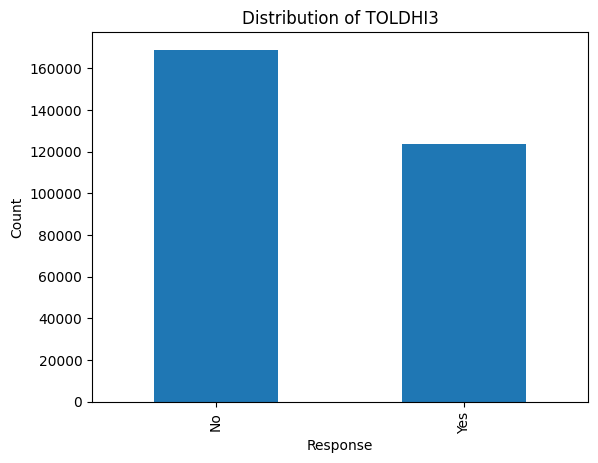

In [22]:
for col in feature_list:
    counts = df[col].value_counts(dropna=False)

    # Print counts for reference
    print(f"\nValue counts for {col}:\n{counts}")

    # Plot
    ax = counts.plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel('Response')
    plt.ylabel('Count')
    title = plt.gca().get_title()
    filename = title.replace(" ", "_").replace("/", "-") + ".jpg"
    plt.savefig(filename, format='jpg', dpi=300)

    #plt.tight_layout()
    plt.show()

In [23]:
bool_feat = ['DEAF', 'BLIND', 'DECIDE', 'DIFFWALK', 'DIFFDRES',
              'DIFFALON', 'SMOKE100', 'FLUSHOT7', 'PNEUVAC4',
               'COVIDPO1', 'EXERANY2', 'TOLDHI3']
cat_feat=['GENHLTH', 'SEATBELT','ECIGNOW2','EDUCA']

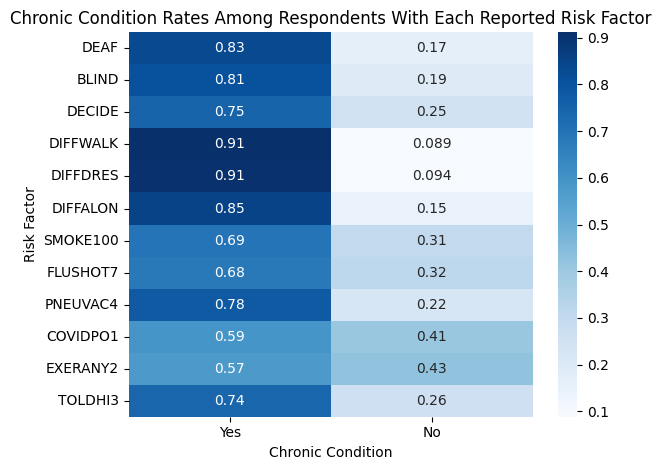

In [24]:
lifestyle_factors = bool_feat  
heat_data = {}

for col in lifestyle_factors:
    yes_rate = df[df[col] == 'Yes']['ALL_CHRONIC'].value_counts(normalize=True)
    heat_data[col] = yes_rate

heat_df = pd.DataFrame(heat_data).T.fillna(0)

sns.heatmap(heat_df, annot=True, cmap='Blues')
plt.title("Chronic Condition Rates Among Respondents With Each Reported Risk Factor")
plt.ylabel("Risk Factor")
plt.xlabel("Chronic Condition")
plt.tight_layout()
plt.savefig("chronic_condition_heatmap.jpg", format='jpg', dpi=300, bbox_inches='tight')

plt.show()


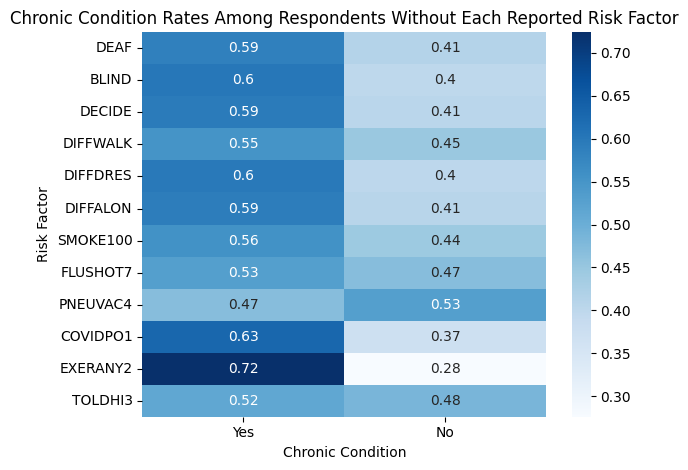

In [25]:
heat_data={}
for col in lifestyle_factors:
    yes_rate = df[df[col] == 'No']['ALL_CHRONIC'].value_counts(normalize=True)
    heat_data[col] = yes_rate

heat_df = pd.DataFrame(heat_data).T.fillna(0)
heat_df = heat_df[['Yes', 'No']]
sns.heatmap(heat_df, annot=True, cmap='Blues')
plt.title("Chronic Condition Rates Among Respondents Without Each Reported Risk Factor")
plt.ylabel("Risk Factor")
plt.xlabel("Chronic Condition")
plt.tight_layout()
plt.savefig("neg_chronic_condition_heatmap.jpg", format='jpg', dpi=300,bbox_inches='tight')
plt.show()

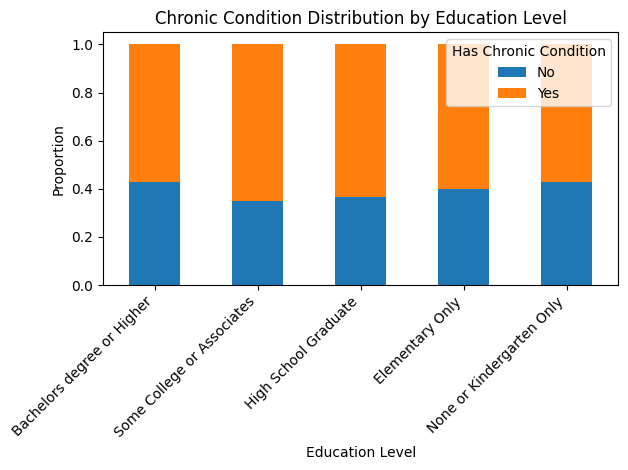

In [26]:
#######USED IN EDA#####

edu_chronic = df.groupby('EDUCA')['ALL_CHRONIC'].value_counts(normalize=True).unstack().fillna(0)
ordered_levels = ["Bachelors degree or Higher","Some College or Associates", "High School Graduate", "Elementary Only", "None or Kindergarten Only"]
edu_chronic = edu_chronic.loc[ordered_levels]

edu_chronic.plot(kind='bar', stacked=True)
plt.title('Chronic Condition Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Proportion')
plt.legend(title='Has Chronic Condition')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("educationvschronic.jpg", format='jpg', dpi=300,bbox_inches='tight')
plt.show()

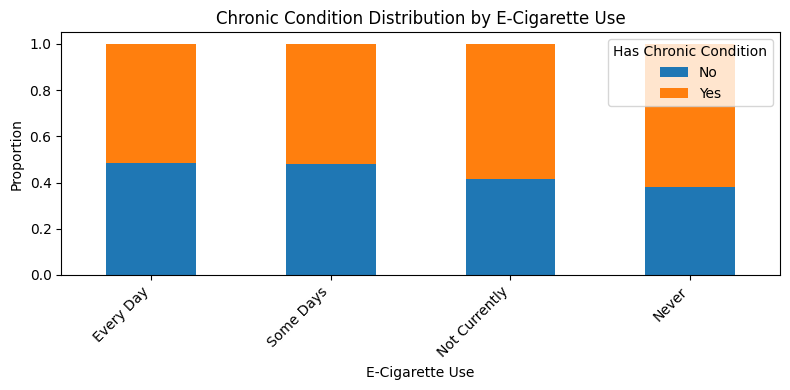

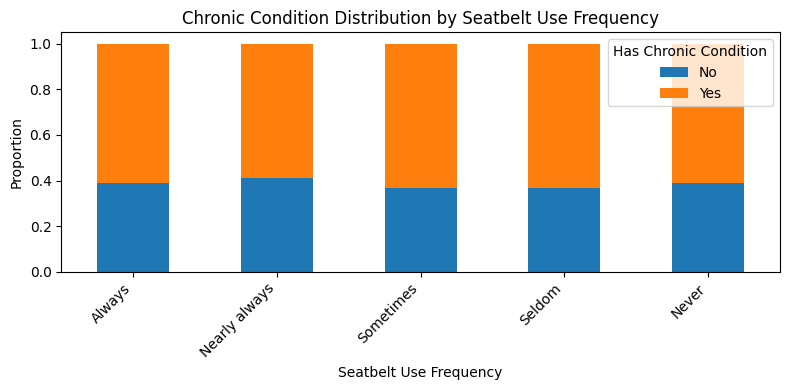

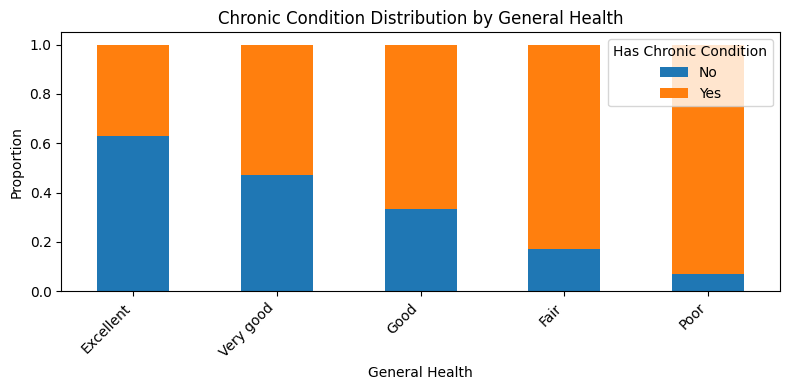

In [27]:
##### USED IN EDA#####

features = ['ECIGNOW2', 'SEATBELT', 'GENHLTH']

# Friendly labels for x-axis
x_labels = {
    'ECIGNOW2': 'E-Cigarette Use',
    'SEATBELT': 'Seatbelt Use Frequency',
    'GENHLTH': 'General Health'
}

#Fix the order of the labels
category_orders = {
    'ECIGNOW2': ['Every Day', 'Some Days', 'Not Currently', 'Never'],  
    'SEATBELT': ['Always', 'Nearly always', 'Sometimes', 'Seldom', 'Never'],
    'GENHLTH': ['Excellent', 'Very good', 'Good', 'Fair', 'Poor']
}

for col in features:

    ctab = pd.crosstab(df[col], df['ALL_CHRONIC'], normalize='index').fillna(0)
    if col in category_orders:
        ctab = ctab.reindex(category_orders[col])
    ax = ctab.plot(kind='bar', stacked=True, figsize=(8, 4))
    plt.title(f'Chronic Condition Distribution by {x_labels[col]}')
    plt.xlabel(x_labels[col])
    plt.ylabel('Proportion')
    plt.legend(title='Has Chronic Condition')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    filename = f"chronic_vs_{col}.jpg".replace(" ", "_").lower()
    plt.savefig(filename, format='jpg', dpi=300, bbox_inches='tight')
    plt.show()


In [28]:
####Check to see if the filtered data was saved

from pathlib import Path

file_path = Path("rq3_filtered.parquet")
if file_path.exists():
    print("File exists.")
else:
    print("File not found.")
    df.to_parquet(
        "rq3_filtered.parquet",
        engine="pyarrow",
        compression="BROTLI",
        compression_level=11,
        index=False
    )

File exists.


In [29]:
tpath = Path("df_train.parquet")
vpath = Path("df_val.parquet")
spath = Path("df_test.parquet")
if tpath.exists() and vpath.exists() and spath.exists():
    print("Split data found, loading files")
    df_train = pd.read_parquet(tpath)
    df_val = pd.read_parquet(vpath)
    df_test = pd.read_parquet(spath)
else:
    df_clustered = df.copy()
    df_testval, df_train = train_test_split(
        df, test_size=0.70, random_state=42, stratify=df["ALL_CHRONIC2"]
    )


    df_test, df_val = train_test_split(
        df_testval, test_size=0.50, random_state=42, stratify=df_testval["ALL_CHRONIC2"]
    )
    j_process.p_save(df_train,"df_train.parquet")
    j_process.p_save(df_val,"df_val.parquet")
    j_process.p_save(df_test,"df_test.parquet")

print(f"Train shape: {df_train.shape}")
print(f"Validation shape: {df_val.shape}")
print(f"Test shape: {df_test.shape}")


Split data found, loading files
Train shape: (204942, 31)
Validation shape: (43916, 31)
Test shape: (43915, 31)


Testing for optimal Kmode Clusters

In [30]:
#### Check to see if KMODE clustering cost results are available
#### Will take a long time to rerun, download "rq3_all_kresults.parquet" to skip
file_path = Path("rq3_all_kresults.parquet")
if file_path.exists():
    print("File exists.")
    all_kresults = pd.read_parquet(file_path)
    print(all_kresults.head())
    
else:
    print("Save not found, running tuner...May take a while...")
    all_kresults = j_clustertuner.kmode_tune(df_val,feature_list,n_cluster=256,n_trials=10,cores=15)





File exists.
   Clusters  AvgTrainCost                                      AllTrainCosts
0         2      159906.2  [158723.0, 160615.0, 160052.0, 162234.0, 16106...
1         3      149284.4  [149329.0, 149382.0, 151356.0, 149804.0, 14908...
2         4      141208.5  [143146.0, 143305.0, 138277.0, 139308.0, 14204...
3         5      136674.0  [137858.0, 139304.0, 133638.0, 136664.0, 13655...
4         6      131521.5  [131306.0, 132770.0, 131116.0, 132818.0, 13190...


In [31]:
j_process.save_if_changed(all_kresults,"rq3_all_kresults.parquet")


rq3_all_kresults.parquet exists. Checking for differences...
Changes detected. Overwriting saved file.
Saved: rq3_all_kresults.parquet


/home/jaime/jupyter/dat_490_rq3/j_process.py:305: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data_clean = data.applymap(


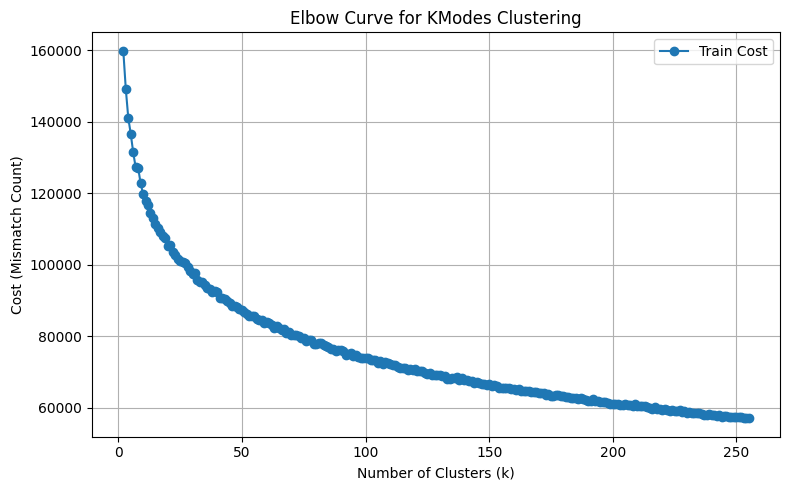

In [32]:
j_clustertuner.plot_kmode_elbow(all_kresults)

Test for Optimal TFlow number of clusters

In [33]:
#####Check to see if silhouette score data is available. 
#####Will take a long time ot rerun, make sure "rq3_all_tresults.parquet" is present

file_path = Path("rq3_all_tresults.parquet")
if file_path.exists():
    print("File exists.Loading file.")
    all_tresults = pd.read_parquet(file_path)
    print(all_tresults.head())

else:
    print("Save not found, running tuner...May take a while...")
    

    all_tresults = j_clustertuner.tflow_tune(df_test,df_val,feature_list)
    j_process.save_if_changed(all_tresults,"rq3_all_tresults.parquet")

File exists.Loading file.
   Clusters  AvgSilhouette                                     AllSilhouettes
0         2       0.069808  [0.065225644048053, 0.08763113072242525, 0.068...
1         3       0.051117  [0.05751124339856475, 0.07010575176413908, 0.0...
2         4       0.030767  [0.045338951034460125, 0.04342952875059009, 0....
3         5       0.032868  [0.027964292815975882, 0.04538036140505297, 0....
4         6       0.026881  [0.021615201219021142, 0.02470274290448259, 0....


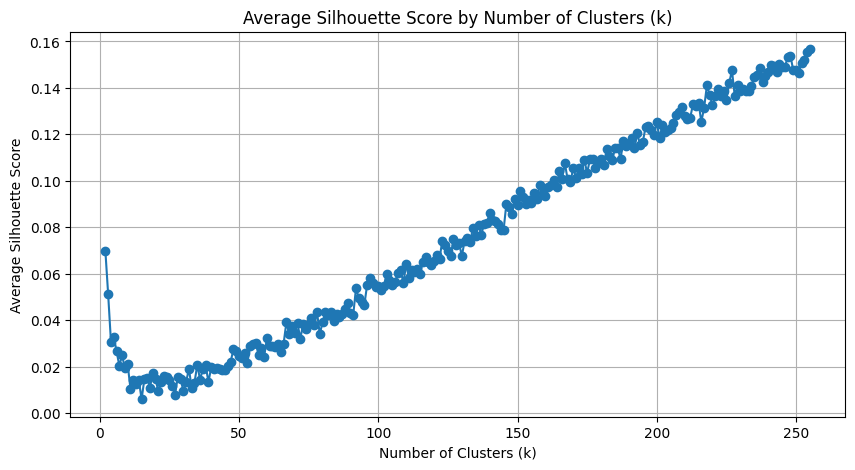

Best k: 255 with silhouette score = 0.1566
Top 5 k values:
  k = 255, score = 0.1566
  k = 254, score = 0.1556
  k = 248, score = 0.1539
  k = 247, score = 0.1533
  k = 253, score = 0.1520


(255,
 0.15664391195612337,
 [(255, 0.15664391195612337),
  (254, 0.1556394157656197),
  (248, 0.15386133013000958),
  (247, 0.15334477019832726),
  (253, 0.15196062417809375)])

In [34]:

j_clustertuner.analyze_silhouette_scores(all_tresults)

[2.74118973e-01 1.39539478e-01 1.36234197e-01 8.13218540e-02
 6.39022744e-02 6.18224718e-02 5.88550740e-02 5.33313274e-02
 4.92996979e-02 3.73051548e-02 2.28744235e-02 7.41371983e-03
 6.16825179e-03 4.33570155e-03 3.47740127e-03 1.14564283e-31
 1.20020847e-33 1.20020847e-33 1.20020847e-33 1.20020847e-33
 1.20020847e-33 1.20020847e-33 1.20020847e-33 1.20020847e-33
 1.20020847e-33 1.20020847e-33 1.20020847e-33]


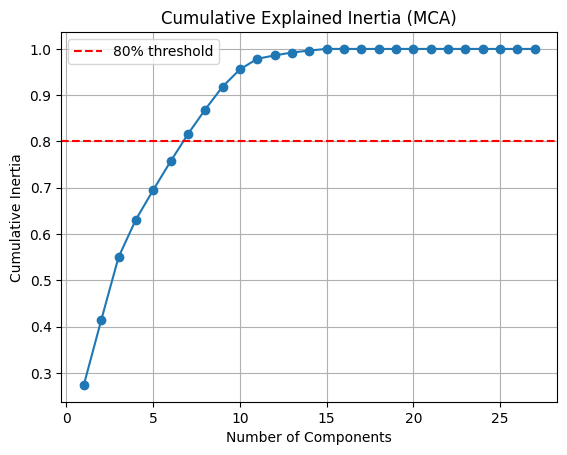

Components to reach 80% inertia: 7


In [35]:


# Ensure both are lists, then combine
bool_feat = list(bool_feat)
cat_feat = list(cat_feat)
combined_feat = bool_feat + cat_feat

# Drop the combined features from df
mca_set = df_train.drop(columns=combined_feat, inplace=False)



mca = prince.MCA( n_components=27,random_state=42)
mca = mca.fit(mca_set)
X_reduced = mca.transform(mca_set)
X_reduced.shape
#explained = mca.explained_inertia_
eigen = mca.eigenvalues_
total = mca.total_inertia_
explained = eigen / total
print(explained)


cumulative = np.cumsum(explained)

plt.plot(range(1, len(cumulative)+1), cumulative, marker='o')
plt.axhline(y=0.8, color='r', linestyle='--', label='80% threshold')
plt.title("Cumulative Explained Inertia (MCA)")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Inertia")
plt.grid(True)
plt.legend()
plt.savefig("mca_inertia.jpg", format='jpg', dpi=300)
plt.show()

# Find minimum number of components to reach 80%
k = np.argmax(cumulative >= 0.80) + 1
print(f"Components to reach 80% inertia: {k}")

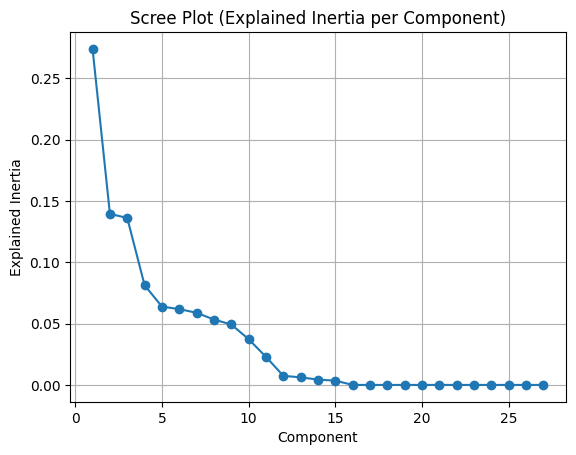

In [36]:
plt.plot(range(1, len(explained)+1), explained, marker='o')
plt.title("Scree Plot (Explained Inertia per Component)")
plt.xlabel("Component")
plt.ylabel("Explained Inertia")
plt.grid(True)
plt.savefig("screeplot_mca.jpg", format='jpg', dpi=300)
plt.show()

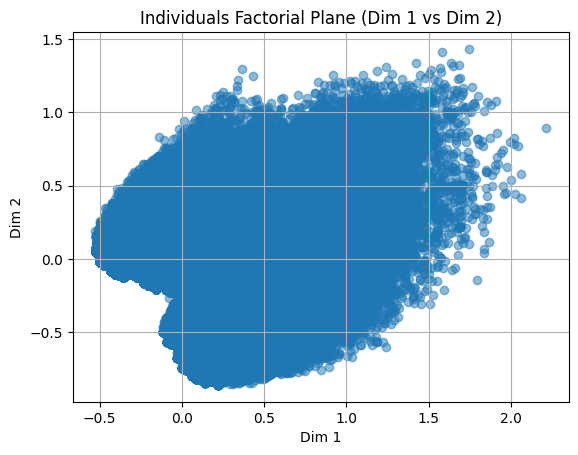

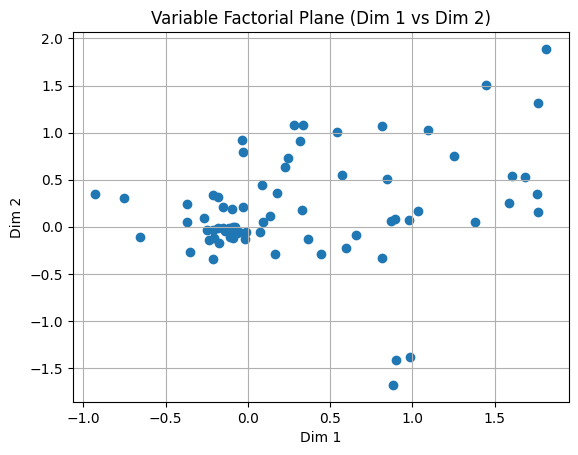

In [37]:
mca = prince.MCA(n_components=2, random_state=42)
mca = mca.fit(df_train)

# For individuals
mca_row_coords = mca.row_coordinates(df_train)
plt.scatter(mca_row_coords[0], mca_row_coords[1], alpha=0.5)
plt.title("Individuals Factorial Plane (Dim 1 vs Dim 2)")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.grid(True)
plt.show()

# For variables
mca_col_coords = mca.column_coordinates(df_train)
plt.scatter(mca_col_coords[0], mca_col_coords[1])
plt.title("Variable Factorial Plane (Dim 1 vs Dim 2)")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.grid(True)
plt.show()


In [38]:
cos2 = (mca_col_coords ** 2).div((mca_col_coords ** 2).sum(axis=1), axis=0)
cos2.head()


,0,1
CVDINFR4__No,0.961542,0.038458
CVDINFR4__Yes,0.961542,0.038458
CVDCRHD4__No,0.992254,0.007746
CVDCRHD4__Yes,0.992254,0.007746
CVDSTRK3__No,0.910311,0.089689


In [39]:
###create model datasets
df_val = pd.concat([df_val,df_test],axis=0)
####Raw set
df_rawtrain = df_train.copy()
df_rawval = df_val.copy()


###Kmodes
km_train = df_train.copy()
km_val = df_val.copy()


###tflow 
tf_train=df_train.copy()
tf_val=df_val.copy()


###tflow 
rf_train=df_train.copy()
rf_val=df_val.copy()


###Cluster
mc_train=df_train.copy()
mc_val=df_val.copy()


In [40]:
###BASELINE SCORES

all_chronic_scores = j_process.run_logistic_model(df_rawtrain,df_rawval,feature_list,"ALL_CHRONIC")
all_cardiac_scores = j_process.run_logistic_model(df_rawtrain,df_rawval,feature_list,"ALL_CARDIAC")
all_pul_scores = j_process.run_logistic_model(df_rawtrain,df_rawval,feature_list,"ALL_PUL")
all_chronic2_scores = j_process.run_logistic_model(df_rawtrain,df_rawval,feature_list,"ALL_CHRONIC2")
all_chronic_results_dict={}
all_cardiac_results_dict={}
all_pul_results_dict={}
all_chronic2_results_dict={}
for feature in feature_list:
    print(f"\n---Running baseline on feature:{feature}---")
    results = j_process.run_logistic_model(df_rawtrain,df_rawval,[feature],"ALL_CHRONIC")
    all_chronic_results_dict[feature]=results

for feature in feature_list:
    print(f"\n---Running baseline on feature:{feature}---")
    results = j_process.run_logistic_model(df_rawtrain,df_rawval,[feature],"ALL_CARDIAC")
    all_cardiac_results_dict[feature]=results

for feature in feature_list:
    print(f"\n---Running baseline on feature:{feature}---")
    results = j_process.run_logistic_model(df_rawtrain,df_rawval,[feature],"ALL_PUL")
    all_pul_results_dict[feature]=results
for feature in feature_list:
    print(f"\n---Running baseline on feature:{feature}---")
    results = j_process.run_logistic_model(df_rawtrain,df_rawval,[feature],"ALL_CHRONIC2")
    all_chronic2_results_dict[feature]=results

Target mapped as: {'No': 0, 'Yes': 1}
Validation Scores -> Accuracy: 0.7042, Precision: 0.8109, Recall: 0.6730, F1: 0.7356
Target mapped as: {'No': 0, 'Yes': 1}
Validation Scores -> Accuracy: 0.7107, Precision: 0.2442, Recall: 0.7035, F1: 0.3626
Target mapped as: {'No': 0, 'Yes': 1}
Validation Scores -> Accuracy: 0.6623, Precision: 0.3103, Recall: 0.5955, F1: 0.4080
Target mapped as: {'No': 0, 'Yes': 1}
Validation Scores -> Accuracy: 0.6895, Precision: 0.6817, Recall: 0.6636, F1: 0.6725

---Running baseline on feature:EDUCA---
Target mapped as: {'No': 0, 'Yes': 1}
Validation Scores -> Accuracy: 0.5398, Precision: 0.6432, Recall: 0.5551, F1: 0.5959

---Running baseline on feature:DEAF---
Target mapped as: {'No': 0, 'Yes': 1}
Validation Scores -> Accuracy: 0.4499, Precision: 0.8303, Recall: 0.1258, F1: 0.2185

---Running baseline on feature:BLIND---
Target mapped as: {'No': 0, 'Yes': 1}
Validation Scores -> Accuracy: 0.4189, Precision: 0.8051, Recall: 0.0652, F1: 0.1206

---Running basel

In [41]:
###RANDOM FOREST BASELINE

# Run Random Forest on all features at once
rf_all_chronic_scores = j_process.run_rf_model(rf_train, rf_val, feature_list, "ALL_CHRONIC")
rf_all_cardiac_scores = j_process.run_rf_model(rf_train, rf_val, feature_list, "ALL_CARDIAC")
rf_all_pul_scores = j_process.run_rf_model(rf_train, rf_val, feature_list, "ALL_PUL")
rf_chronic2_scores = j_process.run_rf_model(rf_train,rf_val,feature_list,"ALL_CHRONIC2")

# Prepare per-feature result dicts
rf_all_chronic_results_dict = {}
rf_all_cardiac_results_dict = {}
rf_all_pul_results_dict = {}
rf_all_chronic2_results_dict={}
# Individual feature runs for ALL_CHRONIC
for feature in feature_list:
    print(f"\n---Running RF baseline on feature: {feature} [ALL_CHRONIC] ---")
    results = j_process.run_rf_model(rf_train, rf_val, [feature], "ALL_CHRONIC")
    rf_all_chronic_results_dict[feature] = results

# Individual feature runs for ALL_CARDIAC
for feature in feature_list:
    print(f"\n---Running RF baseline on feature: {feature} [ALL_CARDIAC] ---")
    results = j_process.run_rf_model(rf_train, rf_val, [feature], "ALL_CARDIAC")
    rf_all_cardiac_results_dict[feature] = results

# Individual feature runs for ALL_PUL
for feature in feature_list:
    print(f"\n---Running RF baseline on feature: {feature} [ALL_PUL] ---")
    results = j_process.run_rf_model(rf_train, rf_val, [feature], "ALL_PUL")
    rf_all_pul_results_dict[feature] = results
for feature in feature_list:
    print(f"\n---Running RF baseline on feature: {feature} [ALL_CHRONIC2] ---")
    results = j_process.run_rf_model(rf_train, rf_val, [feature], "ALL_CHRONIC2")
    rf_all_chronic2_results_dict[feature] = results

Target mapped as: {'No': 0, 'Yes': 1}
RF Validation Scores -> Accuracy: 0.6990, Precision: 0.7957, Recall: 0.6830, F1: 0.7351
Target mapped as: {'No': 0, 'Yes': 1}
RF Validation Scores -> Accuracy: 0.7642, Precision: 0.2275, Recall: 0.4241, F1: 0.2962
Target mapped as: {'No': 0, 'Yes': 1}
RF Validation Scores -> Accuracy: 0.7051, Precision: 0.2965, Recall: 0.3708, F1: 0.3295
Target mapped as: {'No': 0, 'Yes': 1}
RF Validation Scores -> Accuracy: 0.6732, Precision: 0.6648, Recall: 0.6450, F1: 0.6547

---Running RF baseline on feature: EDUCA [ALL_CHRONIC] ---
Target mapped as: {'No': 0, 'Yes': 1}
RF Validation Scores -> Accuracy: 0.5397, Precision: 0.6434, Recall: 0.5542, F1: 0.5955

---Running RF baseline on feature: DEAF [ALL_CHRONIC] ---
Target mapped as: {'No': 0, 'Yes': 1}
RF Validation Scores -> Accuracy: 0.4499, Precision: 0.8303, Recall: 0.1258, F1: 0.2185

---Running RF baseline on feature: BLIND [ALL_CHRONIC] ---
Target mapped as: {'No': 0, 'Yes': 1}
RF Validation Scores -> Acc

In [ ]:
#####TENSOR FLOW BASELINE

tf_all_chronic_scores = j_process.run_tf_model(tf_train, tf_val, feature_list, "ALL_CHRONIC")
tf_all_cardiac_scores = j_process.run_tf_model(tf_train, tf_val, feature_list, "ALL_CARDIAC")
tf_all_pul_scores = j_process.run_tf_model(tf_train, tf_val, feature_list, "ALL_PUL")
tf_chronic2_scores = j_process.run_tf_model(tf_train,tf_val,feature_list,"ALL_CHRONIC2")
# Prepare per-feature result dicts
tf_all_chronic_results_dict = {}
tf_all_cardiac_results_dict = {}
tf_all_pul_results_dict = {}
tf_all_chronic2_results_dict={}
# Individual feature runs for ALL_CHRONIC
for feature in feature_list:
    print(f"\n---Running baseline on feature: {feature} [ALL_CHRONIC] ---")
    results = j_process.run_tf_model(tf_train, tf_val, [feature], "ALL_CHRONIC")
    tf_all_chronic_results_dict[feature] = results

# Individual feature runs for ALL_CARDIAC
for feature in feature_list:
    print(f"\n---Running baseline on feature: {feature} [ALL_CARDIAC] ---")
    results = j_process.run_tf_model(tf_train, tf_val, [feature], "ALL_CARDIAC")
    tf_all_cardiac_results_dict[feature] = results

# Individual feature runs for ALL_PUL
for feature in feature_list:
    print(f"\n---Running baseline on feature: {feature} [ALL_PUL] ---")
    results = j_process.run_tf_model(tf_train, tf_val, [feature], "ALL_PUL")
    tf_all_pul_results_dict[feature] = results
for feature in feature_list:
    print(f"\n---Running baseline on feature: {feature} [ALL_CHRONIC2] ---")
    results = j_process.run_tf_model(rf_train, rf_val, [feature], "ALL_CHRONIC2")
    rf_all_chronic2_results_dict[feature] = results

Target mapped as: {'No': 0, 'Yes': 1}


2025-06-15 02:27:09.790717: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


2745/2745 ━━━━━━━━━━━━━━━━━━━━ 2s 537us/step
TF Model Scores -> Accuracy: 0.6996, Precision: 0.8236, Recall: 0.6473, F1: 0.7249
Target mapped as: {'No': 0, 'Yes': 1}


In [ ]:
km_train=df_train.copy()
km_val=df_val.copy()
tf_train=df_train.copy()
tf_val=df_val.copy()

km_train,km_col,cost = j_process.run_kmodes_cluster(km_train,feature_list,25)
km_test,km_col,cost=j_process.run_kmodes_cluster(km_val,feature_list,25)
tf_train,tf_col=j_process.run_tf_clustering(tf_train,feature_list,25,verbose=1)
tf_test,tf_col=j_process.run_tf_clustering(tf_val,feature_list,25,verbose=1)

kmcluster_log_chronic_scores=j_process.run_logistic_model(km_train,km_test,feature_list+[km_col],"ALL_CHRONIC")
kmcluster_log_cardiac_scores=j_process.run_logistic_model(km_train,km_test,feature_list+[km_col],"ALL_CARDIAC")
kmcluster_log_pul_scores=j_process.run_logistic_model(km_train,km_test,feature_list+[km_col],"ALL_PUL")
kmcluster_log_chronic2_scores=j_process.run_logistic_model(km_train,km_test,feature_list+[km_col],"ALL_CHRONIC2")
kmcluster_tf_chronic_scores=j_process.run_tf_model(km_train,km_test,feature_list+[km_col],"ALL_CHRONIC")
kmcluster_tf_cardiac_scores=j_process.run_tf_model(km_train,km_test,feature_list+[km_col],"ALL_CARDIAC")
kmcluster_tf_pul_scores=j_process.run_tf_model(km_train,km_test,feature_list+[km_col],"ALL_PUL")
kmcluster_tf_chronic2_scores=j_process.run_rf_model(km_train,km_test,feature_list+[km_col],"ALL_CHRONIC2")
kmcluster_rf_chronic_scores=j_process.run_rf_model(km_train,km_test,feature_list+[km_col],"ALL_CHRONIC")
kmcluster_rf_cardiac_scores=j_process.run_rf_model(km_train,km_test,feature_list+[km_col],"ALL_CARDIAC")
kmcluster_rf_pul_scores=j_process.run_rf_model(km_train,km_test,feature_list+[km_col],"ALL_PUL")
kmcluster_rf_chronic2_scores=j_process.run_rf_model(km_train,km_test,feature_list+[km_col],"ALL_CHRONIC2")

tmcluster_log_chronic_scores=j_process.run_logistic_model(tf_train,tf_test,feature_list+[tf_col],"ALL_CHRONIC")
tmcluster_log_cardiac_scores=j_process.run_logistic_model(tf_train,tf_test,feature_list+[tf_col],"ALL_CARDIAC")
tmcluster_log_pul_scores=j_process.run_logistic_model(tf_train,tf_test,feature_list+[tf_col],"ALL_PUL")
tmcluster_log_chronic2_scores=j_process.run_logistic_model(tf_train,tf_test,feature_list+[tf_col],"ALL_CHRONIC2")
tmcluster_tf_chronic_scores=j_process.run_tf_model(tf_train,tf_test,feature_list+[tf_col],"ALL_CHRONIC")
tmcluster_tf_cardiac_scores=j_process.run_tf_model(tf_train,tf_test,feature_list+[tf_col],"ALL_CARDIAC")
tmcluster_tf_pul_scores=j_process.run_tf_model(tf_train,tf_test,feature_list+[tf_col],"ALL_PUL")
tmcluster_tf_chronic2_scores=j_process.run_tf_model(tf_train,tf_test,feature_list+[tf_col],"ALL_CHRONIC2")
tmcluster_rf_chronic_scores=j_process.run_rf_model(tf_train,tf_test,feature_list+[tf_col],"ALL_CHRONIC")
tmcluster_rf_cardiac_scores=j_process.run_rf_model(tf_train,tf_test,feature_list+[tf_col],"ALL_CARDIAC")
tmcluster_rf_pul_scores=j_process.run_rf_model(tf_train,tf_test,feature_list+[tf_col],"ALL_PUL")
tmcluster_rf_chronic2_scores=j_process.run_rf_model(tf_train,tf_test,feature_list+[tf_col],"ALL_CHRONIC2")

In [ ]:

km_col

